<font size=3>首先导入数据，了解数据基本信息，如列名称及代表意义，数据类型等；另外需要导入需要相关分析的packages，例如pandas、numpy，以及可视化工具matplotlib及seaborn。</font>

<font size=3>数据中列名称包括PassengerId表示乘客编号，Survived表示在事故中是否存活，Pclass表示乘客舱位等级(包括三个等级)，Name表示乘客的姓名，Sex表示乘客的性别，Age表示乘客年龄，SibSp和Parch表示具有相关亲缘关系的乘客数量，Ticket表示购票数量，Fare表示购买的票价、Cabin表示客舱编号、Embarked表示搭乘的港口；从常规情况来看，乘客的**Age(年龄)**、**Pclass(乘客舱位等级)**、**Fare(票价)**、**Sex(性别)**在事故中生还率具有代表性意义，所以本次将从这四个变量对生还情况进行分析。</font>

In [1]:
#import the nessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import math
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
sns.set(color_codes=True)

In [2]:
try:
    df = pd.read_csv("titanic_data.csv")
except:
    df = pd.read_csv("titanic-data.csv")

In [3]:
print "The infomation of the value: "
print df.info()

The infomation of the value: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
print "The Columns Name: "
print df.columns

The Columns Name: 
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [5]:
#keep the raw data being unchanged
raw_data = deepcopy(df)

#get the data to analyse
raw_data = raw_data.loc[:, ["Survived", "Pclass", "Sex", "Age", "Fare"]]

raw_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
print "The total number of the passenger: %i" % len(raw_data)
print "The number of the survived passenger in the accident: %i" % sum(raw_data["Survived"] == 1)
print "The ratio of the survived passenger: %.3f" % (sum(raw_data["Survived"] == 1) * 1.0 / len(raw_data))


The total number of the passenger: 891
The number of the survived passenger in the accident: 342
The ratio of the survived passenger: 0.384


<font size=3>对数据集加载后，了解数据的缺失情况，Cabin丢失的数据较多(<font color="red">**缺失687个数据**</font>)，Age数据有部分缺失(<font color="red">**缺失177个数据**</font>)。接下来对数据进行分析，为了保持分析处理数据不对原始数据产生影响，防止需要重复使用原始数据时重复加载数据，采用对数据进行完全复制的方式解决。对数据进行初步分析了解总体的**<font color="red">乘客数</font>**和**<font color="green">生还人数</font>**，数据中包含了**<font color="red">891</font>**名乘客，其中生还的人数为<font color="green">342</font>名，生还率**0.384**。</font>

<font size=3><b>从展示的数据类型以及结合分析的方便，Age(年龄)</b>、<b>Pclass(乘客等级)</b>、<b>Fare(票价)</b>以及<b>Sex(性别)</b>的数据类型中，Pclass的数据类型为Int型，但在实际分析中该数据类型最好是Object。其他数据的数据类型可以直接使用，不做处理。接下来将详细地对年龄、乘客等级、票价及性别对生还情况进行。</font>

In [7]:
# cope wtith the data type of Pclass
def passengerclass(data):
    if data == 1:
        return "1st"
    elif data == 2:
        return "2nd"
    elif data == 3:
        return "3rd"
    else:
        return data
raw_data["Pclass"] = raw_data["Pclass"].map(passengerclass)

Populating the interactive namespace from numpy and matplotlib


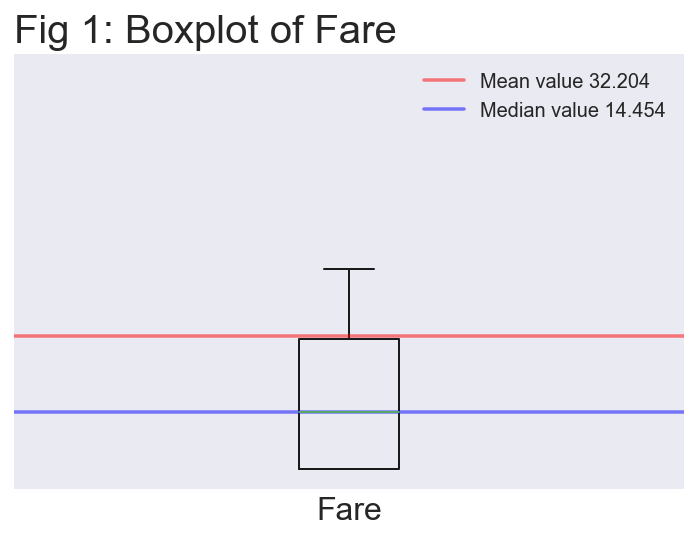

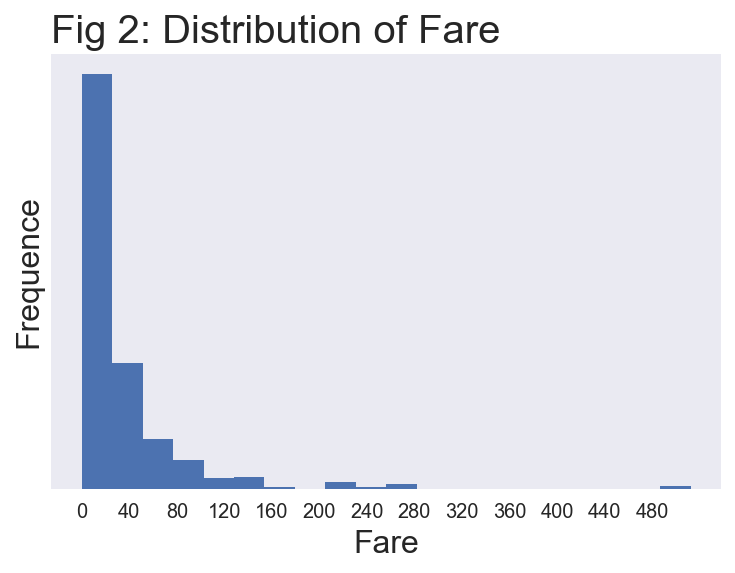

The mean value of Fare is 32.2042079686.
The median value of Fare is 14.4542.


In [8]:
#Fistly analyse the Fare
%pylab inline
plt.boxplot(raw_data["Fare"])
plt.yscale("log")
plt.xlabel("Fare", fontsize=16)
plt.title("Fig 1: Boxplot of Fare", fontsize=20, loc="left", fontweight=1)
line1 = plt.axhline(y=raw_data["Fare"].mean(), color="red", alpha=.5)
line2 = plt.axhline(y=raw_data["Fare"].median(), color="blue", alpha=0.5)
plt.legend([line1, line2], ["Mean value %.3f" % raw_data["Fare"].mean(), 
                            "Median value %.3f" % raw_data["Fare"].median()], loc="upper right")
plt.yticks([])
plt.xticks([])
plt.grid(linewidth=0)
plt.show()
plt.hist(df["Fare"], bins=20)
plt.ylabel("Frequence", fontsize=16)
plt.xlabel("Fare", fontsize=16)
plt.yticks([])
plt.xticks(np.arange(0,max(raw_data["Fare"]), 40))
plt.title("Fig 2: Distribution of Fare", fontsize=20, loc="left")
plt.grid(linewidth=0)
plt.show()

print "The mean value of Fare is {0}.\nThe median value of Fare is {1}." \
        .format(raw_data["Fare"].mean(), raw_data["Fare"].median())

<font size=3.5>通过调用pandas的info方法，显示出Fare(票价)数据中没有出现丢失数据，且其数据类型符合数据分析要求。从Fare的盒须图(Fig 1)可知，Fare的平均数(<font color="red">红线显示的平均值为32.20</font>)严重偏离数据群，而Fare的中位数(<font color="blue">绿色直线显示的中位数为14.45</font>)在数据中具有显著的代表性，因此接下来的分析时使用中位数进行分析。从Fare的频数分布图(Fig 2)中，也显示出了购买票价在20左右的人数明显很多，而超过200之后购买的人数偏少；存在的极大值达到500左右影响了平均值的代表作用。综合来看为了保证数据的完整性和数据代表性，暂时使用Fare的中位数分析Fare和乘客生还之间的关系。</font>

In [9]:
#analyse the correlation between the Fare and the Svrvived
def checkstatus(data):
    if(data["Fare"] >= raw_data["Fare"].median() and 
      data["Survived"] == 1) or (data["Fare"] < 
    raw_data["Fare"].median() and data["Survived"] == 0):
        return 1
    else:
        return 0

raw_data["Farestatus"] = raw_data.apply(checkstatus, axis=1)
print "The total of the correlation between the Fare and the Survived is %i" \
        % (raw_data["Farestatus"].sum())
print "The percentage of the correlation between the Fare and the Survived is %.2f " \
        % (raw_data["Farestatus"].sum() * 100.0 /len(raw_data))

The total of the correlation between the Fare and the Survived is 560
The percentage of the correlation between the Fare and the Survived is 62.85 


Populating the interactive namespace from numpy and matplotlib


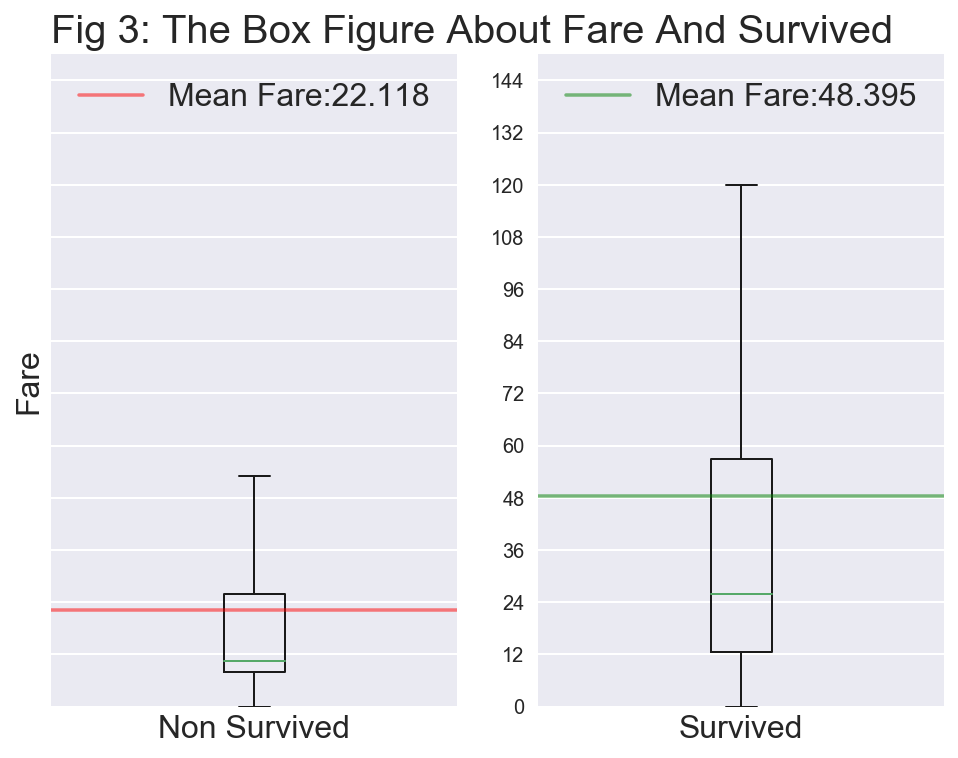

In [10]:
#plot the scatter figrue
%pylab inline
plt.figure(1, figsize=(8,6))
plt.subplot(1,2,1)#draw one of the two pic
boxplot1 = plt.boxplot(raw_data[raw_data["Survived"]==0]["Fare"])
plt.title("Fig 3: The Box Figure About Fare And Survived", fontsize=20, loc="left")
plt.ylabel("Fare", fontsize=16)
plt.ylim(0,150)
plt.yticks(np.arange(0,150, 12))
plt.xticks([])
plt.xlabel("Non Survived",fontsize=16)
plt.tick_params(axis="y", labelleft=False)
hline1 = plt.axhline(df.groupby("Survived")["Fare"].mean()[0], c="red", alpha=.5)
plt.legend([hline1], ["Mean Fare:%.3f" % raw_data.groupby("Survived")["Fare"].mean()[0]], loc="upper center",fontsize=16)
plt.subplot(1,2,2)
boxplot2 = plt.boxplot(raw_data[raw_data["Survived"]==1]["Fare"],labels=["Survived"])
plt.ylim(0,150)
plt.yticks(np.arange(0,150, 12))
plt.xticks([])
plt.xlabel("Survived",fontsize=16)
hline1 = plt.axhline(raw_data.groupby("Survived")["Fare"].mean()[1], c="green", alpha=.5)
plt.legend([hline1], ["Mean Fare:%.3f" % df.groupby("Survived")["Fare"].mean()[1]], loc="upper center", fontsize=16)
plt.show()

In [11]:
fare_group_mean = raw_data.groupby("Survived")["Fare"].mean()
fare_group_var = raw_data.groupby("Survived")["Fare"].var()
fare_group_count = raw_data.groupby("Survived")["Fare"].count()
pool_var = (fare_group_var[0] + fare_group_var[1])/ (sum(fare_group_count)-2)
std_err = math.sqrt(pool_var/fare_group_count[0] + pool_var/fare_group_count[1])
t_statistic = (fare_group_mean[0]-fare_group_mean[1]) / std_err
print "The mean of Fare about Survived is %.3f; the mean of Fare about Non Survived is %.3f" \
        % (fare_group_mean[1], fare_group_mean[0])
print "The pooled variance of Fare about different Survived is %.3f" % pool_var
print "The t statistic value is %.3f" % t_statistic

The mean of Fare about Survived is 48.395; the mean of Fare about Non Survived is 22.118
The pooled variance of Fare about different Survived is 6.097
The t statistic value is -154.483


<font size=3>利用Fare的中位数分析其和生还情况的关系，显示出Fare和Survived呈现正相关性的数据个数为<b>560</b>，占整个Fare数据集中的比例为<b>62.85%</b>。利用pandas的goupby方法，将票价分类为生还和死亡的两类分析<ol>
<li>从盒须图(Fig 3票价和生还的盒须图)中，可以看书不论生还与否，平均票价都偏离集中分布的区域，因此两者的票价都是一个左偏态分布</li>
<li>死亡的乘客中票价平均值是22.118，而生还的乘客的中票价的平均值是48.395。</li>
<li>对对生还与否和价格关系感兴趣，因此将数据分为生还和死亡，对票价进行t检验统计分析。此处我们提出Null hypothesis为生还乘客的票价和死亡乘客的票价无差异，即总体中生还的票价u和死亡的票价u是相等的；提出Alternative hypothesis为两者的票价均值不等。同时采用two side way的检验方法，设置检验水平alpha值为0.5。</li>
<li>经计算，死亡的票价和生还的票价的t值为-154.483，该统计值已经远大于临界t值。因此我们拒绝接受Null hypothesis，票价对生还情况具有相关性。</li>
</ol></font><br>
<p>==================================================================================================================</p>
<font size=3>接下来分析舱位等级和存活人员的情况</font>

In [12]:
print "The number of different pansenger class:\n"
pclass_data = raw_data.groupby(["Pclass"], as_index=False)["Survived"].count()
print pclass_data

The number of different pansenger class:

  Pclass  Survived
0    1st       216
1    2nd       184
2    3rd       491


Populating the interactive namespace from numpy and matplotlib


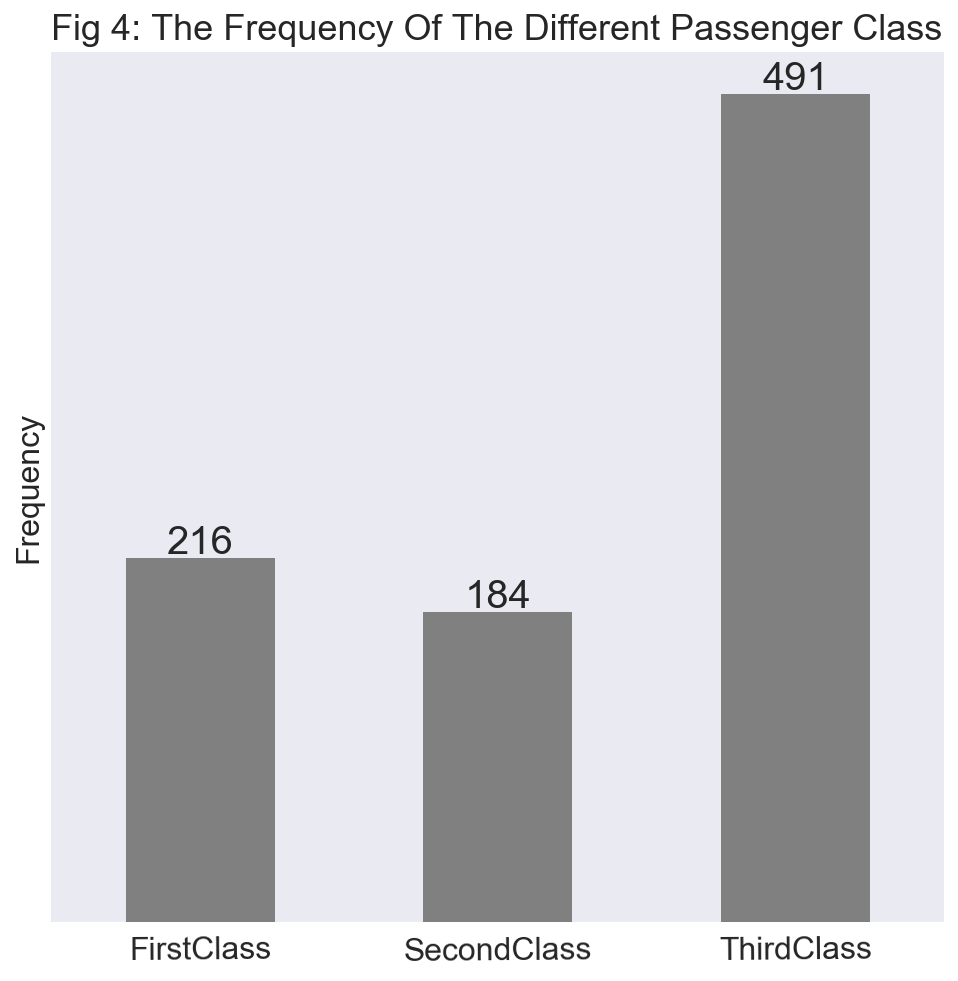

In [13]:
%pylab inline
pclass_data.plot(x=np.array(["FirstClass", "SecondClass", "ThirdClass"]), kind="bar", 
                align="center", figsize=(8,8), color="grey")
plt.tick_params(axis="x", labelsize=16, rotation=.5) 
plt.title("Fig 4: The Frequency Of The Different Passenger Class", loc="left", fontsize=18)
plt.ylabel("Frequency", fontsize=16)
plt.yticks([])
plt.tick_params(axis="x", labelsize=16) #change the axis x font size
plt.grid(linewidth=0)
plt.legend([])
for (x, y) in zip(range(3), pclass_data["Survived"].values):
    plt.text(x, y+2, "%d" % y, horizontalalignment="center", size=20)
plt.show()

In [14]:
pclass_survive_data = raw_data.groupby(["Survived","Pclass"])["Survived"].count()
pclass_survive_ratio = pclass_survive_data / len(raw_data)
print "The Ratio of The Different Passenger Class In The Total Passenger: \n"
print pclass_survive_ratio

The Ratio of The Different Passenger Class In The Total Passenger: 

Survived  Pclass
0         1st       0.089787
          2nd       0.108866
          3rd       0.417508
1         1st       0.152637
          2nd       0.097643
          3rd       0.133558
Name: Survived, dtype: float64


Populating the interactive namespace from numpy and matplotlib


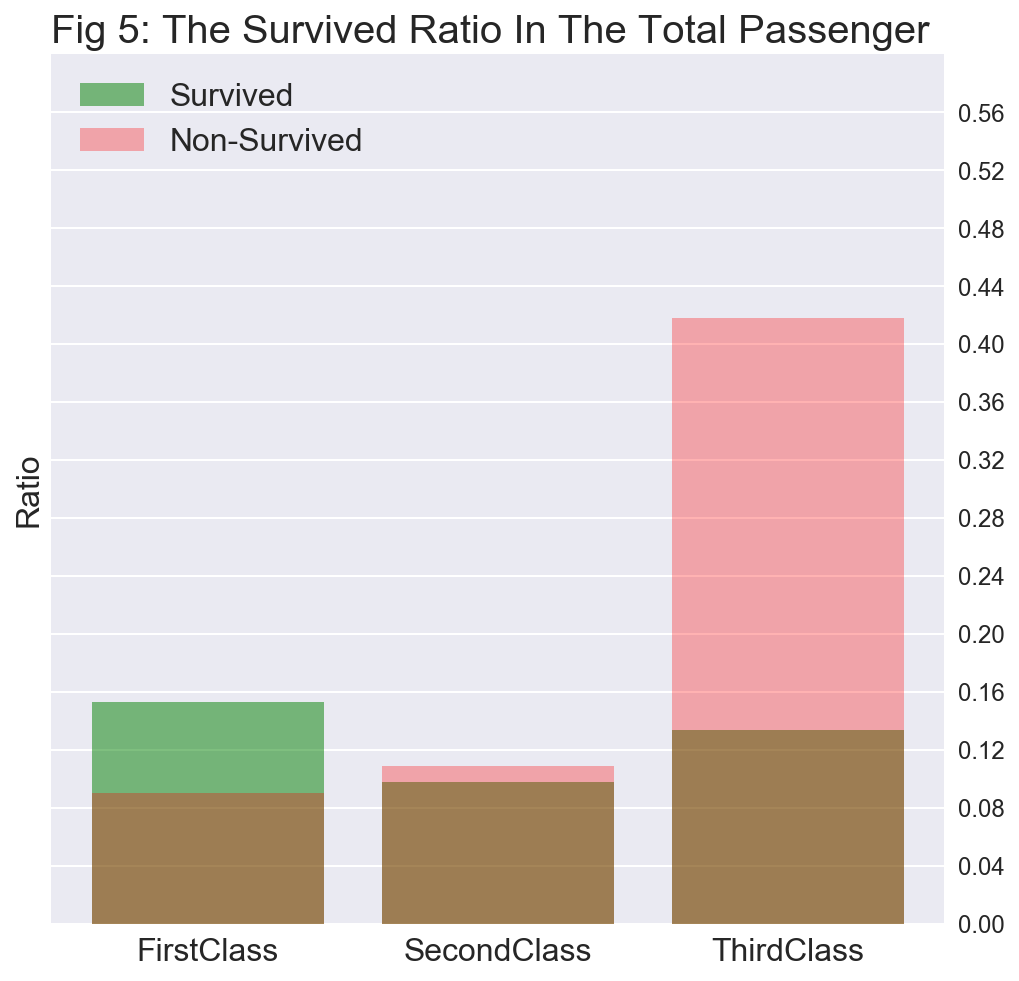

In [15]:
%pylab inline
plt.figure(figsize=(8,8))
bar1 = plt.bar(x=np.array(["FirstClass", "SecondClass", "ThirdClass"]), height=pclass_survive_ratio[3:], 
               align="center", color="green", alpha=0.5)
bar2 = plt.bar(x=np.array(["FirstClass", "SecondClass", "ThirdClass"]), height=pclass_survive_ratio[:3], 
               align="center", color="red", alpha=0.3)
plt.legend([bar1, bar2], ["Survived", "Non-Survived"], loc="upper left", fontsize=16)
plt.title("Fig 5: The Survived Ratio In The Total Passenger", loc="left", fontsize=20)
plt.ylabel("Ratio", fontsize=16)
plt.ylim(0, 0.6)
plt.yticks(np.arange(0,0.6,0.04))
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelright="on", labelleft="off", labelsize=12)
plt.grid(axis="x", linewidth=0)
plt.show()

In [16]:
print "The Ratio of The Different Passenger Class In The Different Passenger Class:\n"
diff_pclass_survive_data = pclass_survive_data / np.hstack((df.groupby(by="Pclass")["Pclass"].count(), \
                                                            df.groupby(by="Pclass")["Pclass"].count()))
print diff_pclass_survive_data

The Ratio of The Different Passenger Class In The Different Passenger Class:

Survived  Pclass
0         1st       0.370370
          2nd       0.527174
          3rd       0.757637
1         1st       0.629630
          2nd       0.472826
          3rd       0.242363
Name: Survived, dtype: float64


Populating the interactive namespace from numpy and matplotlib


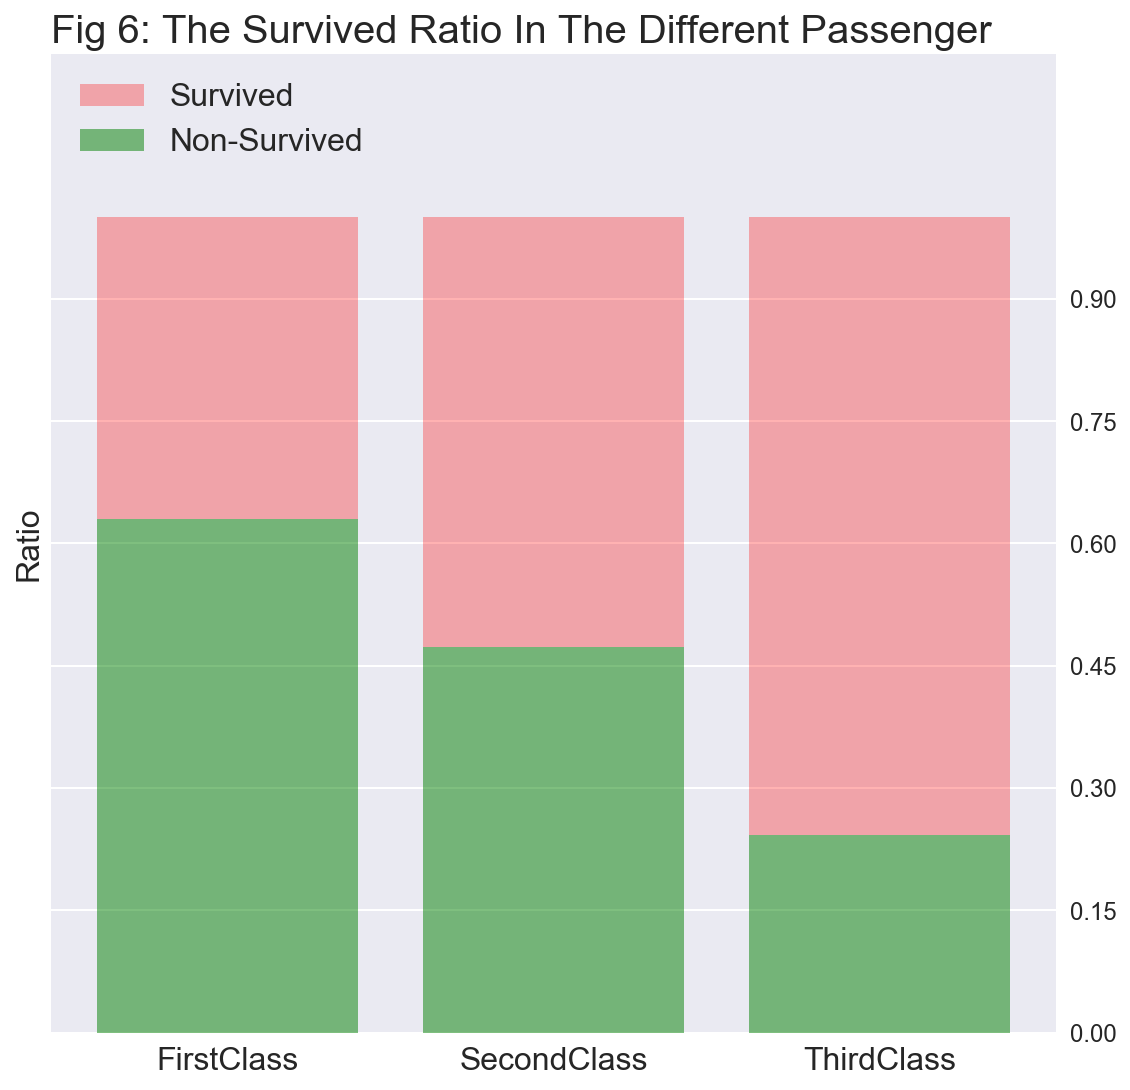

In [17]:
%pylab inline
plt.figure(figsize=(9,9))
bar1 = plt.bar(x=np.array(["FirstClass", "SecondClass", "ThirdClass"]), height=diff_pclass_survive_data[:3], 
              bottom=diff_pclass_survive_data[3:], align="center", color="red", alpha=0.3)
bar2 = plt.bar(x=np.array(["FirstClass", "SecondClass", "ThirdClass"]), height=diff_pclass_survive_data[3:],
               align="center", color="green", alpha=0.5)
plt.legend([bar1, bar2], ["Survived", "Non-Survived"], loc="upper left", fontsize=16)
plt.title("Fig 6: The Survived Ratio In The Different Passenger", loc="left", fontsize=20)
plt.ylabel("Ratio", fontsize=16)
plt.ylim(0, 1.2)
plt.yticks(np.arange(0,1.0,0.15))
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelright="on", labelleft="off", labelsize=12)
plt.grid(axis="x", linewidth=0)
plt.show()

<font size=3>从不同舱位等级的乘客数量和生还情况分析(Fig 4显示来各舱位等级的人员频数分布;Fig 5显示来各舱位等级生还情况，且按照占总乘客人数比例来分析;Fig 6分析的是各舱位等级内，乘客生还比例)显示来看，能分析出以下可能性：
<ol>
<li>三等舱的乘客最多，达到了491人；其次是头等舱的乘客，人数为216人；二等舱的人数最少，为184人。因为三等舱的乘客可能人员密度最大，因此可以预见到三等舱中到死亡率占所有乘客的死亡率是最高的。在Fig 5中反应出了，三等舱的死亡率偏高达到了41.75%，考虑到三等舱的疏散设施不完备以及次生性伤害也可能增加伤亡率。</li>
<li>各舱位乘客的死亡率和生还率环比分析，一等舱和二等舱的生还率最高，分别是62.96%和47.28%。三等舱的死亡率表现明显票高达到了75.76%</li>
<li>从生还率上来看，头等舱的乘客的生还率是最高的，占总体人员的15.26%，其次是三等舱的生还率达到了13.35%(在Fig 5中显示)。但是三等舱的生还率高同样是受到人员基数过大的影响。</li>
</ol>
从实际意义上来看，当意外发生实因为三等舱人员多，可能发生其他人为行伤害形成的死亡也会是死亡率增加。考虑到三等舱的乘客实在下层，如果相应的疏散措施缺乏，那么很有可能被困在船舱中。所以综合客观实际情况以及考虑生存率分析，乘客应当尽量避免在三等舱。
</font><br>
<p>==================================================================================================================</p>
<font size=3>接下来分析乘客年龄和存活人员的情况</font>

In [18]:
age_survived = df.loc[:,["Survived", "Age"]]
age_survived.dropna(axis=0, inplace=True)
print "After dropping the missing value, threre are %d the valide data.And there are %d data." \
        % (len(age_survived), len(df))

After dropping the missing value, threre are 714 the valide data.And there are 891 data.


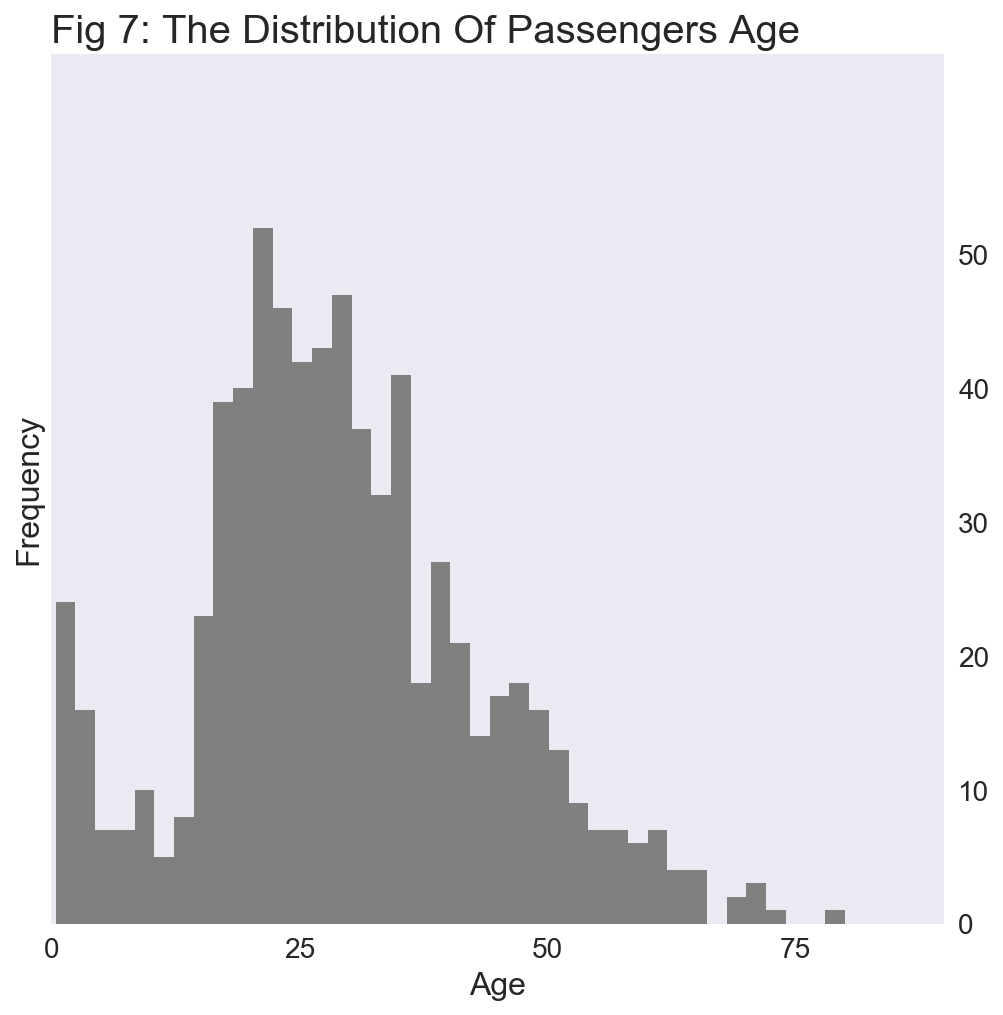

In [19]:
plt.figure(figsize(8,8))
plt.hist(age_survived["Age"], bins=40, color="grey")
plt.title("Fig 7: The Distribution Of Passengers Age", loc="left", fontsize=20)
plt.ylim(0, 65)
plt.yticks(np.arange(0, 60,10))
plt.xlim(0, 90)
plt.xticks(np.arange(0,100, 25))
plt.xlabel("Age", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.tick_params(axis="both", labelsize=14)
plt.tick_params(axis="y", labelright="on", labelleft="off")
plt.grid(linewidth=0)
plt.show()

Populating the interactive namespace from numpy and matplotlib


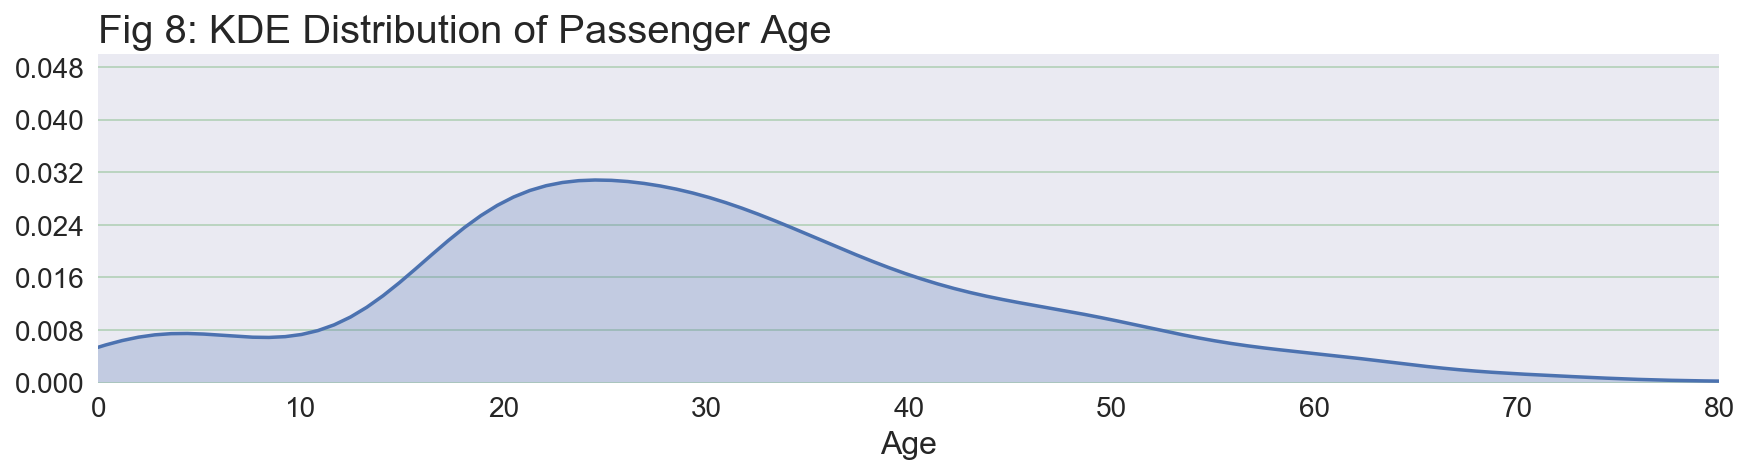

In [20]:
%pylab inline
fig = sns.FacetGrid(raw_data,aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
fig.set(xlim=(0,int(age_survived["Age"].max())))
plt.title("Fig 8: KDE Distribution of Passenger Age", fontsize=20, loc="left")
plt.ylim(0, 0.05)
plt.yticks(np.arange(0, 0.05,0.008))
plt.xlabel("Age", fontsize=16)
plt.tick_params(axis="both", labelsize=14)
plt.grid(axis="x", linewidth=0)
plt.grid(axis="y", c="green", linewidth=0.2)
plt.show()

Populating the interactive namespace from numpy and matplotlib


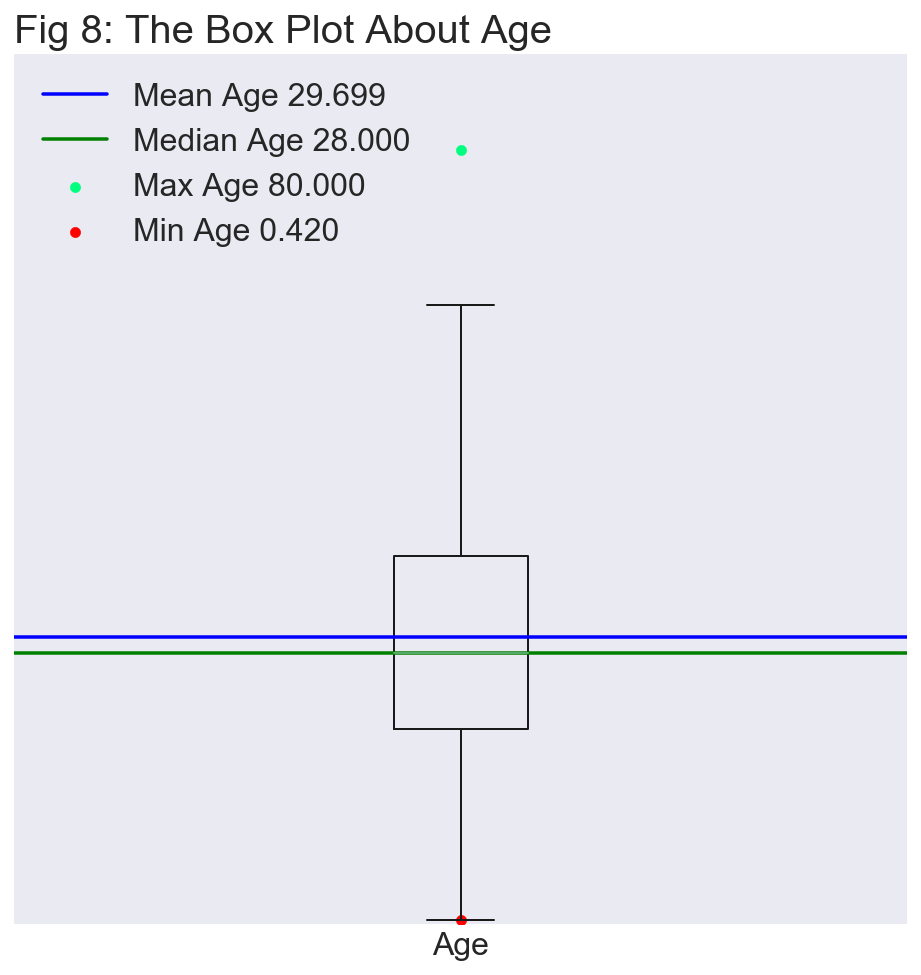

In [21]:
%pylab inline
plt.figure(figsize(8, 8))
boxplot1 = plt.boxplot(age_survived["Age"])
addline1 = plt.axhline(age_survived["Age"].mean(), color="blue")
addline2 = plt.axhline(age_survived["Age"].median(), color="green")
maxline = plt.scatter(np.array([1]), np.array([age_survived["Age"].max()]), s=26, c="SpringGreen")
minline = plt.scatter(np.array([1]), np.array([age_survived["Age"].min()]), s=26, c="red")
plt.legend([addline1, addline2, maxline, minline], ["Mean Age %.3f" % age_survived["Age"].mean(), 
                                  "Median Age %.3f" % age_survived["Age"].median(), 
                                    "Max Age %.3f"%age_survived["Age"].max(),
                                    "Min Age %.3f"%age_survived["Age"].min()],
           fontsize=16, loc="upper left")

plt.title("Fig 8: The Box Plot About Age", loc="left", fontsize=20)
plt.ylim(0, 90)
plt.xlabel("Age", fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

Populating the interactive namespace from numpy and matplotlib


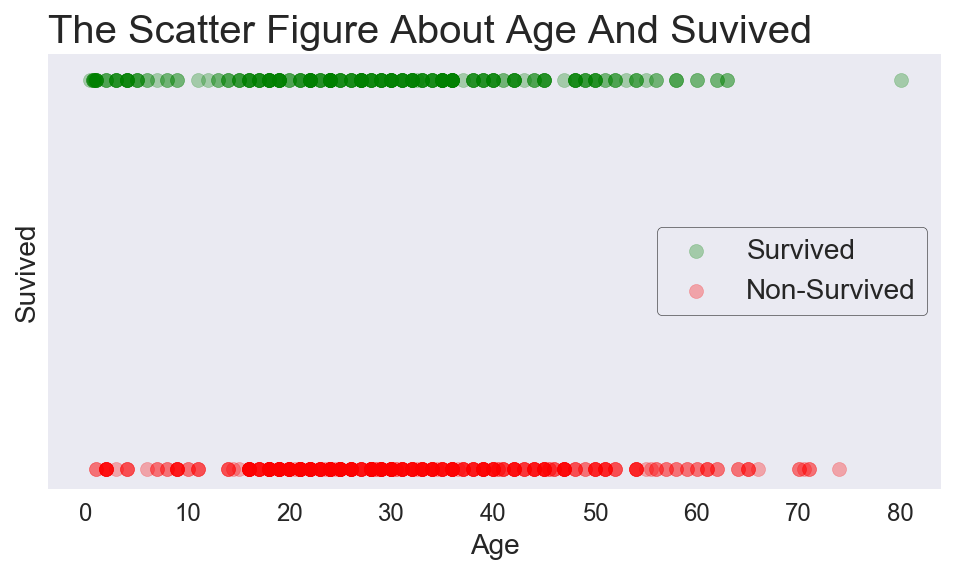

In [22]:
#plot the scatter figrue
#the scatter figure to find something new
%pylab inline
plt.figure(figsize(8,4))
scatter1 = plt.scatter(x=age_survived[age_survived["Survived"]==1]["Age"], 
                       y=age_survived[age_survived["Survived"]==1]["Survived"], alpha=0.3, c="green")
scatter2 = plt.scatter(x=age_survived[age_survived["Survived"]==0]["Age"], 
                       y=age_survived[age_survived["Survived"]==0]["Survived"], alpha=0.3, c="red")
plt.legend([scatter1, scatter2], ["Survived", "Non-Survived"], loc="best",
           frameon=True,fontsize=14, fancybox=True, edgecolor="black")

plt.title("The Scatter Figure About Age And Suvived", fontsize=20, loc="left")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Suvived", fontsize=14)
plt.yticks([])
plt.xticks(fontsize=12)
plt.grid(linewidth=0)
plt.show()

<h3>注释：上面的散点图和分析仅是好奇，期望能够找到一些独特点——请不要做review的结论</h3>

Populating the interactive namespace from numpy and matplotlib


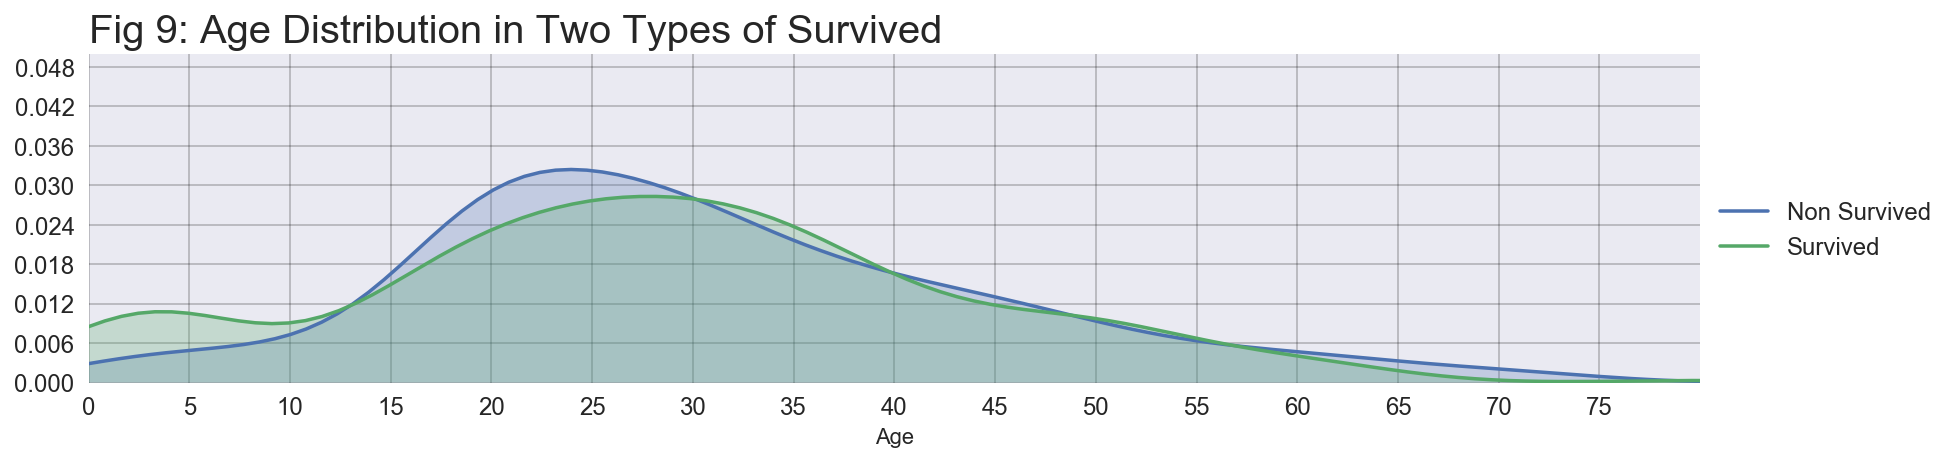

In [23]:
%pylab inline
def status(data):
    if data == 1:
        return "Survived"
    else:
        return "Non Survived"

age_survived["Status"] =age_survived["Survived"].apply(status)
fig = sns.FacetGrid(age_survived,hue="Status",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
fig.set(xlim=(0,int(age_survived["Age"].max())))
plt.title("Fig 9: Age Distribution in Two Types of Survived", loc="left", fontsize=20)
plt.ylim(0, 0.050)
plt.yticks(np.arange(0, 0.050, 0.006), fontsize=12)
plt.xticks(np.arange(0, int(age_survived["Age"].max()), 5), fontsize=12)
fig.add_legend(title="", fontsize=12)
plt.grid(linewidth=0.2,color="black")
plt.show()

In [24]:
intervel_data = pd.qcut(np.arange(0, 110, 10), 10) #cut the 10 intervel
def age_status(data, intervel_data=intervel_data):
    for i in intervel_data:
        if data in i:
            return i

age_survived["Intervel"] = age_survived["Age"].apply(age_status)
age_survived_intervel = age_survived.groupby(["Survived", "Intervel"])["Survived"].count()
age_intervel = age_survived.groupby("Intervel")["Intervel"].count()
print "There are %i passengers between 30 and 40" % age_intervel.values[3]
print "There are %i survived passengers between 30 and 40. And the survived ritio is %.3f in the age rank!" \
        % (age_survived_intervel[1].values[3], 
        age_survived_intervel[1].values[3] * 1.0 / age_intervel.values[3])

There are 155 passengers between 30 and 40
There are 69 survived passengers between 30 and 40. And the survived ritio is 0.445 in the age rank!


Populating the interactive namespace from numpy and matplotlib


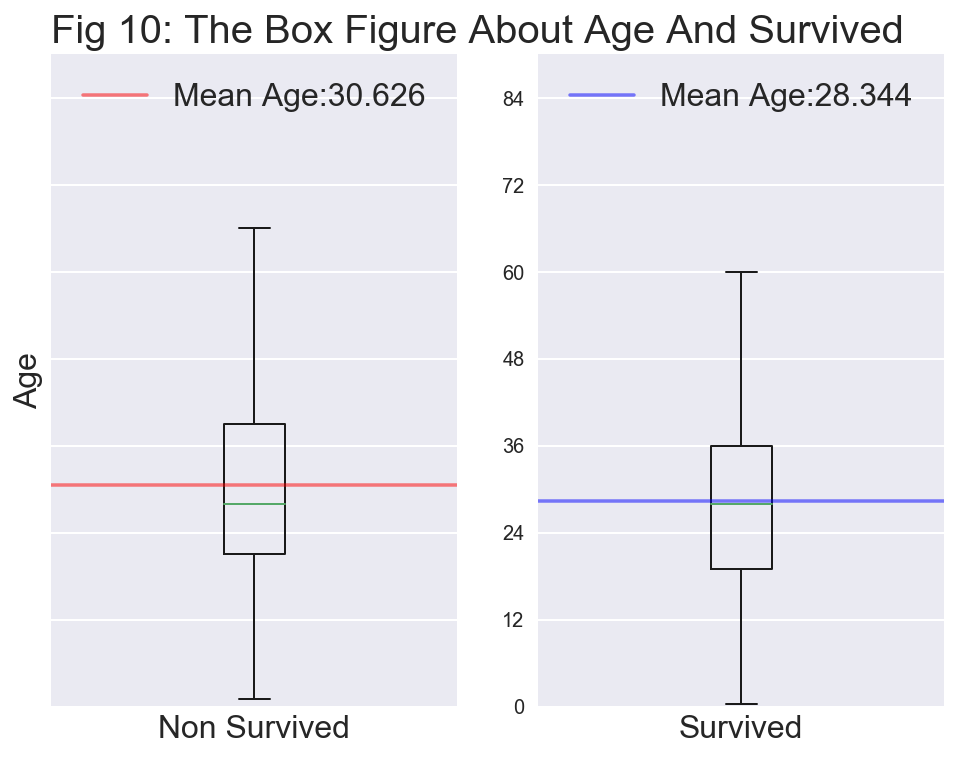

In [25]:
#plot the scatter figrue
%pylab inline
plt.figure(1, figsize=(8,6))
plt.subplot(1,2,1)#draw one of the two pic
boxplot1 = plt.boxplot(age_survived[age_survived["Survived"]==0]["Age"])
plt.title("Fig 10: The Box Figure About Age And Survived", fontsize=20, loc="left")
plt.ylabel("Age", fontsize=16)
plt.ylim(0,90)
plt.yticks(np.arange(0,90, 12))
plt.xticks([])
plt.xlabel("Non Survived",fontsize=16)
plt.tick_params(axis="y", labelleft=False)
hline1 = plt.axhline(age_survived.groupby("Survived")["Age"].mean()[0], c="red", alpha=.5)
plt.legend([hline1], ["Mean Age:%.3f" % age_survived.groupby("Survived")["Age"].mean()[0]], loc="upper center",fontsize=16)
plt.subplot(1,2,2)
boxplot2 = plt.boxplot(age_survived[age_survived["Survived"]==1]["Age"],labels=["Survived"])
plt.ylim(0,90)
plt.yticks(np.arange(0,90, 12))
plt.xticks([])
plt.xlabel("Survived",fontsize=16)
hline1 = plt.axhline(age_survived.groupby("Survived")["Age"].mean()[1], c="blue", alpha=.5)
plt.legend([hline1], ["Mean Age:%.3f" % df.groupby("Survived")["Age"].mean()[1]], loc="upper center", fontsize=16)
plt.show()

In [26]:
age_group_mean = age_survived.groupby("Survived")["Age"].mean()
age_group_var = age_survived.groupby("Survived")["Age"].var()
age_group_count = age_survived.groupby("Survived")["Age"].count()
pool_var = (age_group_var[0] + age_group_var[1])/ (sum(age_group_count)-2)
std_err = math.sqrt(pool_var/age_group_count[0] + pool_var/age_group_count[1])
t_statistic = (age_group_mean[0]-age_group_mean[1]) / std_err
print "The mean of Age about Survived is %.3f; the mean of Age about Non Survived is %.3f" \
        % (age_group_mean[1], age_group_mean[0])
print "The pooled variance of Age about different Survived is %.3f" % pool_var
print "The t statistic value is %.3f" % t_statistic
print "The statics degree of freedom is %i" % (sum(age_group_count)-2)

The mean of Age about Survived is 28.344; the mean of Age about Non Survived is 30.626
The pooled variance of Age about different Survived is 0.596
The t statistic value is 38.798
The statics degree of freedom is 712


<font size=3>对数据集中的年龄进行分析，从年龄分布图的情况可以得出以下结论<ol>
<li>总体年龄分布图(Fig 7年龄分布直方图以及Fig 8年龄分布的核密度图)中，显示了年龄主要集中在15岁至40岁，另外最大的年龄达到了80岁，而最小的年龄是在0.42岁——即是婴儿</li>
<li>分析年龄和生还情况(Fig 9 年龄和生还情况的核密度图)，显示年龄在20岁到50岁之间的人员死亡率偏高，死亡率最高的是在24岁左右达到0.033左右——关于此点，从用该区域分布的乘客数量也是最多的，可以预见到。</li>
<li>从核密度图中，可以看出各年龄段段人员生还情况，生还和死亡比在0岁至12岁以及30岁至39岁之间是明显较高的，考虑到儿童优先的准则的情况下，这个比例是符合了一般情况。</li>
<li>现在对生还率比例较高的区间感兴趣，对30岁到40岁之间(age包含在(30,40]之间)的乘客进行另外分析。经分析显示在该年龄区间内的乘客人数为155人，其中有69人生还，该区间内的生还比例为0.445。</li>
<li>对不同生还情况和年龄进行分类分析(Fig 10年龄和不同生还情况的盒须图)，生还的平均年龄在28.344，死亡乘客的平均年龄值在30.626，两者相差不是很大。对年龄和生还情况进行统计分析，使用t检验的two side way的方法，alpha的值设为0.05；提出Null hypothesis为死亡乘客的年龄和生还乘客的年龄相同，Alternative hypothesis为两者的年龄不同。</li>
<li>计算得到了t的统计值为38.798，而自由度在712，two side way的P value显著小于0.0001。因此拒绝接受Null hypothesis，乘客年龄和生还情况可能存在相关性。</li>
</ol></font><br>

In [27]:
sex_survive_group = raw_data.groupby(["Survived", "Sex"])["Sex"].count()
sex_survive_ratio = sex_survive_group / len(raw_data)
sex_group = raw_data.groupby("Sex")["Sex"].count()
print "The Ratio of The Different Sex In The Total Passenger: \n"
print  sex_survive_ratio
sex_group

The Ratio of The Different Sex In The Total Passenger: 

Survived  Sex   
0         female    0.090909
          male      0.525253
1         female    0.261504
          male      0.122334
Name: Sex, dtype: float64


Sex
female    314
male      577
Name: Sex, dtype: int64

Populating the interactive namespace from numpy and matplotlib


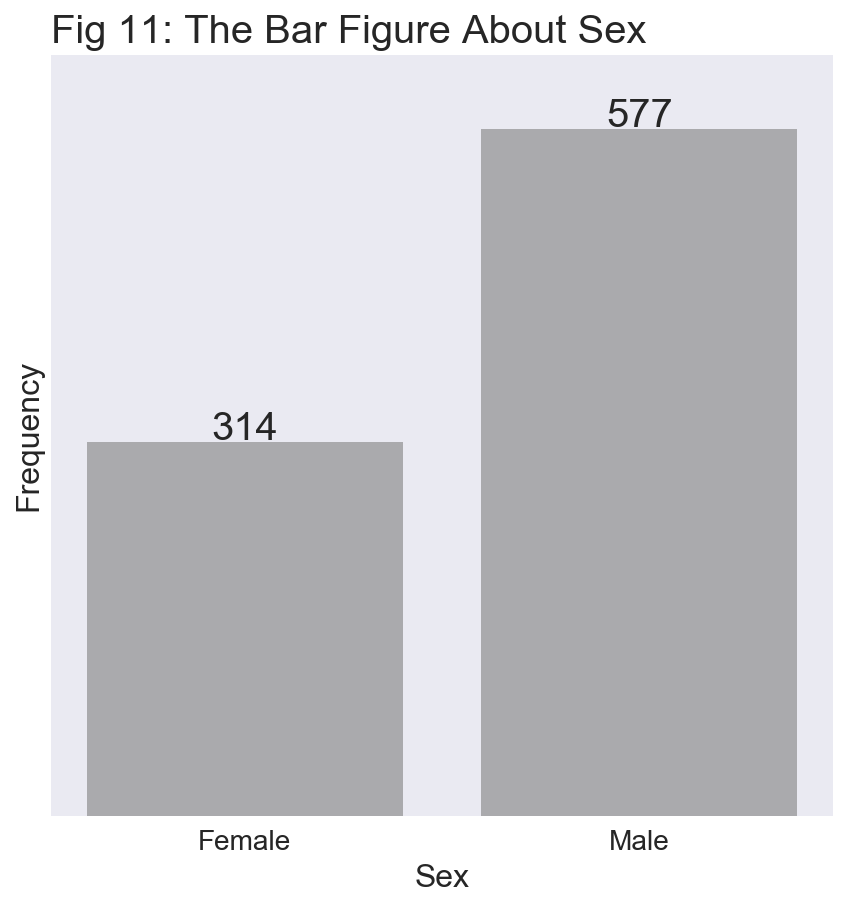

In [28]:
%pylab inline
plt.figure(figsize=(7,7))
plt.bar(x=np.array(["Female", "Male"]), height=sex_group, align="center", color="grey", alpha=0.6)
plt.title("Fig 11: The Bar Figure About Sex", loc="left", fontsize=20)
plt.xlabel("Sex", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=14)
plt.ylim(0,640)
plt.yticks(np.arange(0, 620,200))
plt.grid(axis="both", linewidth=0)
plt.tick_params(axis="y", labelleft=False)
for (x, y) in zip(range(2), sex_group.values):
    plt.text(x, y+2, "%d" % y, horizontalalignment="center", size=20)
plt.show()

Populating the interactive namespace from numpy and matplotlib


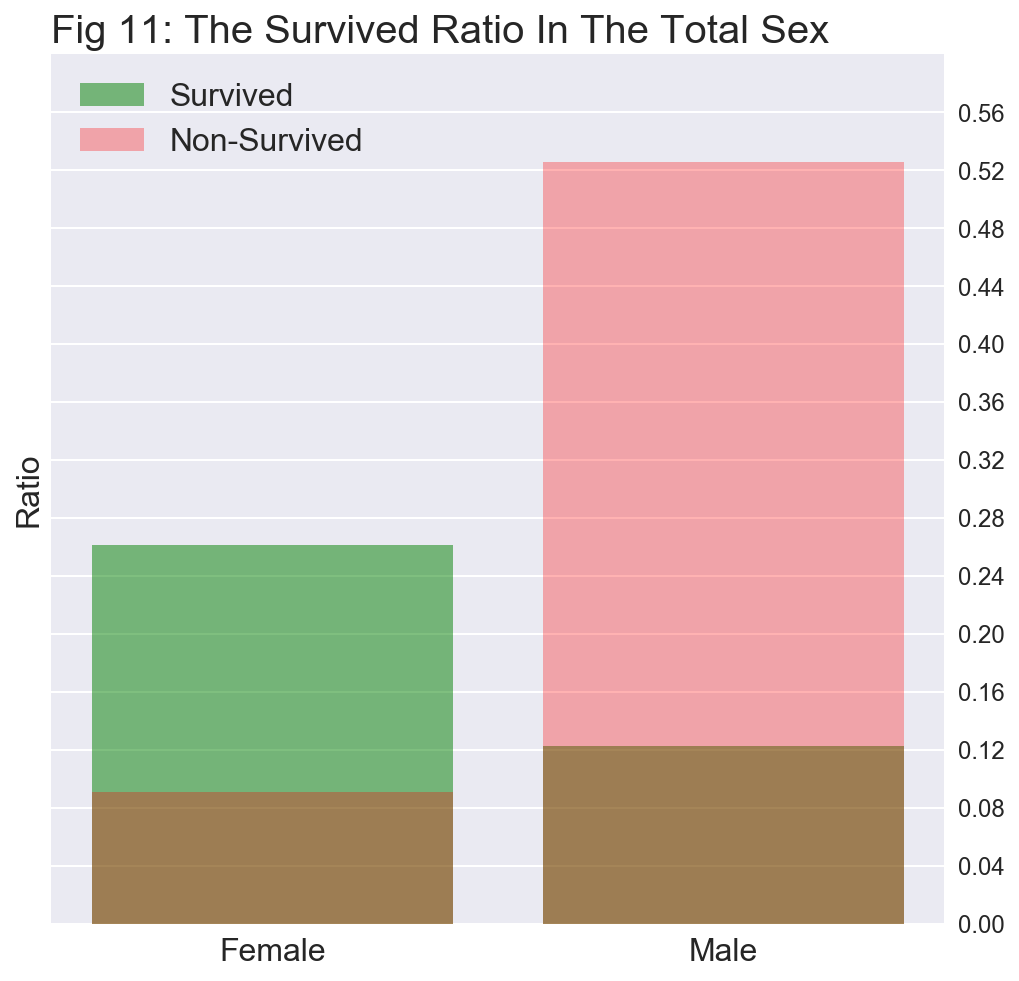

In [29]:
%pylab inline
plt.figure(figsize=(8,8))
bar1 = plt.bar(x=np.array(["Female", "Male"]), height=sex_survive_ratio[2:], 
               align="center", color="green", alpha=0.5)
bar2 = plt.bar(x=np.array(["Female", "Male"]), height=sex_survive_ratio[:2], 
               align="center", color="red", alpha=0.3)
plt.legend([bar1, bar2], ["Survived", "Non-Survived"], loc="upper left", fontsize=16)
plt.title("Fig 11: The Survived Ratio In The Total Sex", loc="left", fontsize=20)
plt.ylabel("Ratio", fontsize=16)
plt.ylim(0, 0.6)
plt.yticks(np.arange(0,0.6,0.04))
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelright="on", labelleft="off", labelsize=12)
plt.grid(axis="x", linewidth=0)
plt.show()

Populating the interactive namespace from numpy and matplotlib


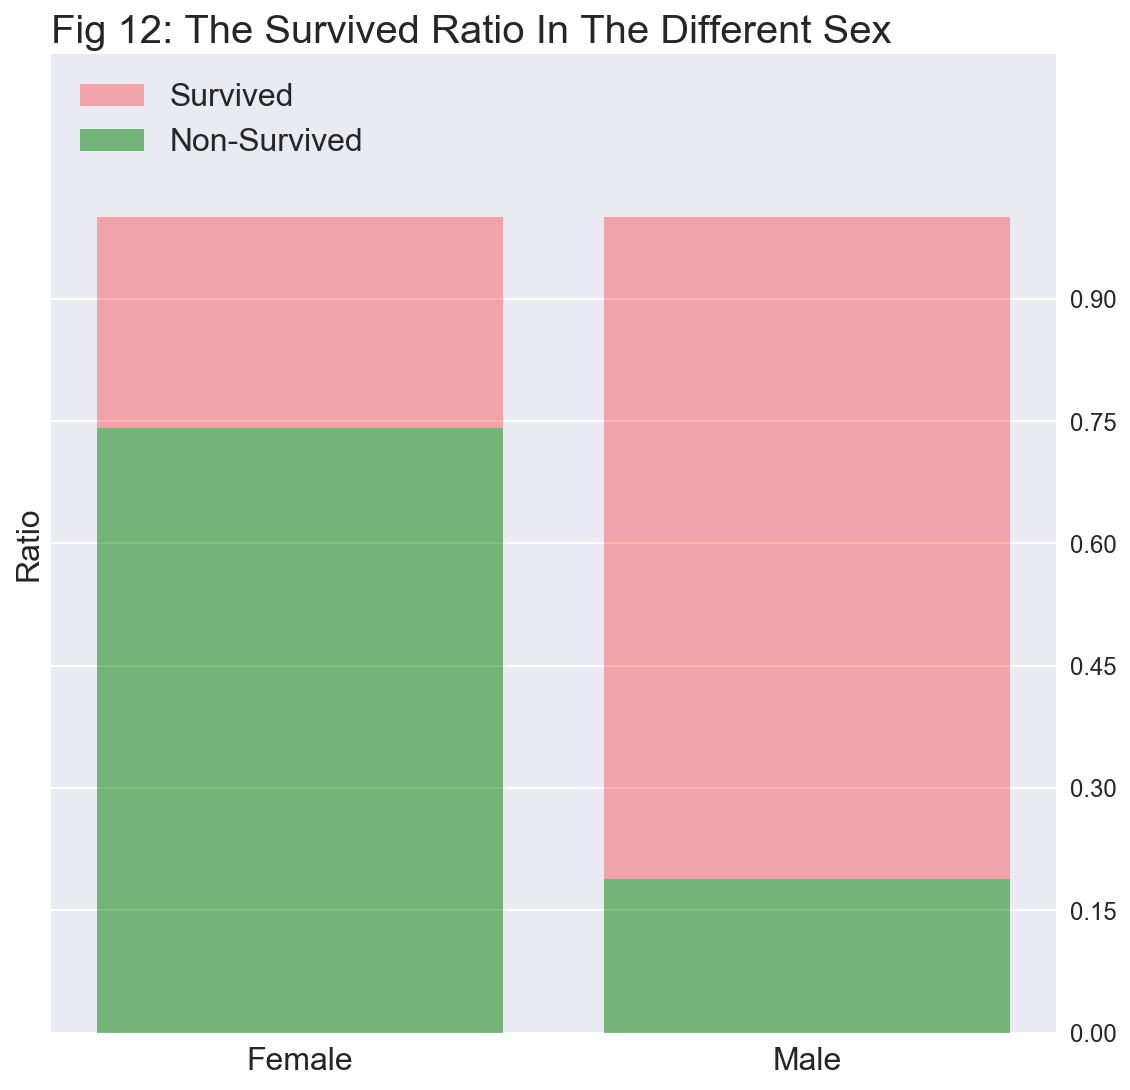

In [30]:
diff_sex_survive_data = sex_survive_group / np.hstack((raw_data.groupby(by="Sex")["Sex"].count(), \
                                                       raw_data.groupby(by="Sex")["Sex"].count()))
%pylab inline
plt.figure(figsize=(9,9))
bar1 = plt.bar(x=np.array(["Female", "Male"]), height=diff_sex_survive_data[:2], 
              bottom=diff_sex_survive_data[2:], align="center", color="red", alpha=0.3)
bar2 = plt.bar(x=np.array(["Female", "Male"]), height=diff_sex_survive_data[2:],
               align="center", color="green", alpha=0.5)
plt.legend([bar1, bar2], ["Survived", "Non-Survived"], loc="upper left", fontsize=16)
plt.title("Fig 12: The Survived Ratio In The Different Sex", loc="left", fontsize=20)
plt.ylabel("Ratio", fontsize=16)
plt.ylim(0, 1.2)
plt.yticks(np.arange(0,1.0,0.15))
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelright="on", labelleft="off", labelsize=12)
plt.grid(axis="x", linewidth=0)
plt.show()

<font size=3>从不同性别和人员生还情况分析(Fig 11显示了不同性别的频数;Fig 11显示来不同性别生还与否占总体乘客的比例;Fig 12分析的是不同性别生还与否占各性别内比例)显示来看，能分析出以下可能性：
<ol>
	<li>乘客中男性乘客占总体上的一般以上，达到了577人，而女性乘客的数量为314人。因为男性乘客的基数较大，同时基于对女士和儿童优先的假设，男性的生还率会明显偏低。</li>
	<li>在Fig 11中，显示了男性乘客的死亡率达到了50%以上，同时生还率在12%左右；另一方面，女性的生还率达到了26%左右，而死亡率占总体人数的9%左右。</li>
	<li>在Fig 12中，不同性别内的生还率中，女性的生还率在75%左右。</li>
</ol>
</font><br>

<h3>结论：</h3>
<font size=3><p>本次分析是针对泰坦尼克号的乘客生还情况分析，总共的样本数量为891个；使用了<b>票价、年龄、舱位等级以及性别</b>四个变量和生还情况进行分析——其中舱位等级和性别是Category Variable，年龄和票价是Numeric Variable。在分析年龄和票价使用了t检验的方法，得到两者和生还情况是Independent的关系，但是和生还情况的具体关系还需要深入分析，也需要大群体去检验(泰坦尼克号的总体乘客数量超过了891人)；同时因为年龄存在缺失值，在分析时使用了抛弃该个体的处理方式，对总体预测的影响还需要深入分析。</p>
<p>从四个变量中，仅能得出一个基本的生还情况侧写——一等舱、高票价、女性及低年龄段(包括青年人)具有更高生还率的可能性。但是在客观情况的复杂性上，是需要需要参考更多的变量和数量集才能作出更精确的推断。</p></font>